# Peak fitting for Scherrer analysis

## Data prep before this step

- perform batch integration on a set of GIWAXS data
- the integrations should all be in the same angular range
- these integrations should be put in a CSV file, where the first column is the q-values and the following columns are the integrations


## Fitting function

- this script fits an isolated peak to $ y = mx + c + Gaussian$
- represented by $y = mx + c + A \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$
- $x$ and $y$ are q-values and integrated intensities, repsectively (`x`, `y` in the script)
- $m$ and $c$ are linear background (`m`, `c`)
- $A$ is amplitude of Gaussian peak (`A`)
- $\mu$ is mean of Gaussian  (`mu`) 
- $\sigma$ is standard deviation / width of Gaussian  (`sigma`) 

In [153]:
# import libraries and modules here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.optimize import curve_fit

In [143]:
# all functions used in script go here


# combined linear + Gaussian function
def linear_gaussian_func(x, m, c, A, mu, sigma):
    linear_part = m * x + c
    gaussian_part = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return linear_part + gaussian_part

# combined linear + Lorentzian function
def linear_lorentzian_func(x, m, c, A, mu, sigma):
    linear_part = m * x + c
    lorentzian_part = A / (np.pi * sigma * (1 + ((x - mu) / sigma) ** 2))
    return linear_part + lorentzian_part


# def linear_func(x, m, c):
#     return m * x + c

# def gaussian_func(x, A, mu, sigma):
#     return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [144]:
# enter filepath and filename 
# remember .csv at the end of filename
data = pd.read_csv('/home/goughl/Documents/beamtime_data/2112_ESRF/MAR/ANDREAS/oct_paper/241029_AEL_OoP_250_265.csv')
x = data.iloc[2:, 0].values.astype(float)  # Skip header for x values
y_values = data.iloc[2:, 1:].values.astype(float)  # Skip header for y values
dataset_labels = data.columns[1:].tolist() 

print(dataset_labels)
# # data should be in following format: first col is x values (the qvalues)
# # following columns contain integrations with one peak isolated
# script can be used with no prior BG removal
# # in csv format!

['RT', '60', '80', '100', '120', '140']


## Important!! 

- only run linear-Gaussian fit OR linear-Lorentzian fit NOT both
- the FWMH and therefore Scherrer calculations will be done on whichever of these cells was run last
- best practice is to comment the one you're not using out so you don't get mixed up

In [145]:
# ### LINEAR GAUSSIAN FIT ###

# # define the min and max x values / q-range for fitting
# fit_range_min = 0.4
# fit_range_max = 1
# # there should only be one peak within the defined range!!


# # empty list to store parameters for each dataset
# params_list = []

# for i in range(y_values.shape[1]):
#     y = y_values[:, i]

#     # masks data outside defined range
#     fit_mask = (x >= fit_range_min) & (x <= fit_range_max)
#     x_fit = x[fit_mask]
#     y_fit = y[fit_mask]

#     # initial guesses for m, c, A, mu, sigma
#     initial_guess = [1, np.mean(y_fit), max(y_fit), x_fit[np.argmax(y_fit)], 0.1]

#     # Fit the combined model with bounds to enforce positive sigma
#     params, _ = curve_fit(
#         linear_gaussian_func, 
#         x_fit, 
#         y_fit, 
#         p0=initial_guess, 
#         bounds=([-np.inf, -np.inf, -np.inf, -np.inf, 0], np.inf)  # Enforces positive sigma
#     )
    
#     m, c, A, mu, sigma = params

#     # Append the parameters for this dataset to the list
#     params_list.append([dataset_labels[i], m, c, A, mu, sigma])

#     # plotting
#     fitted_model = linear_gaussian_func(x, m, c, A, mu, sigma)
#     residuals = y - fitted_model
#     plt.figure(figsize=(10, 6))
#     plt.subplot(2, 1, 1)
#     plt.plot(x, y, 'b-', label=f'Original data (curve {dataset_labels[i]} °C)')
#     plt.plot(x, fitted_model, 'r-', label=f'Fitted model')
#     plt.axvline(fit_range_min, color='k', linestyle='--')
#     plt.axvline(fit_range_max, color='k', linestyle='--')
#     plt.legend()
    
# # residuals should just be slightly noisy - do this as sanity check     
# #     plt.subplot(2, 1, 2)
# #     plt.plot(x, residuals, 'g-', label='Residuals')
# #     plt.legend()
     
#     plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

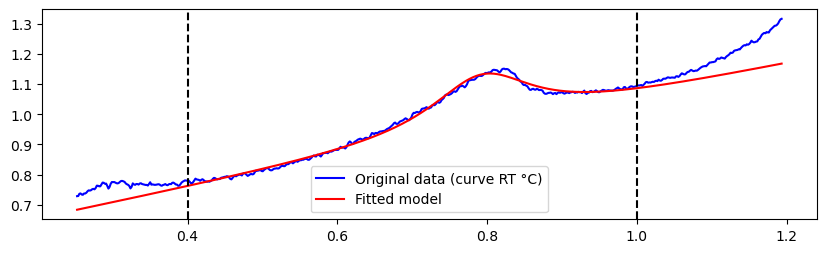

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

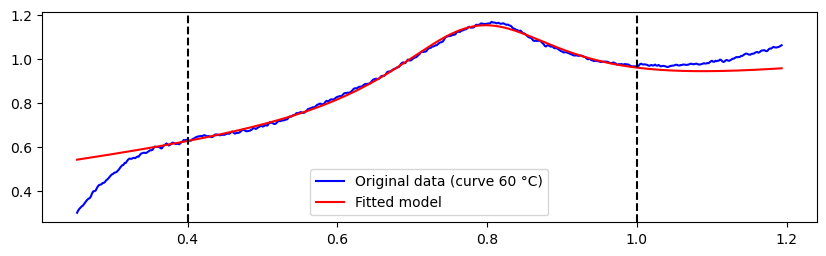

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

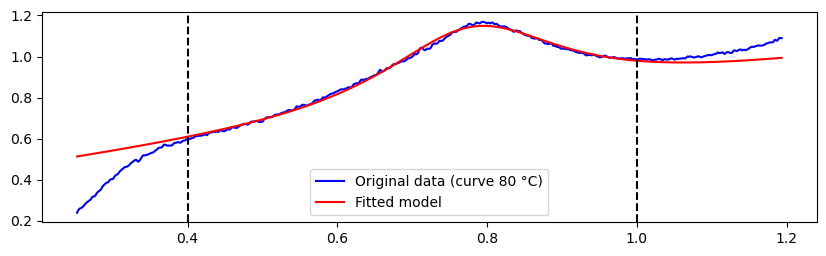

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

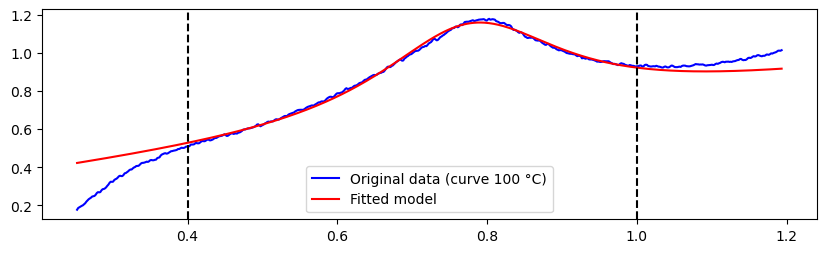

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

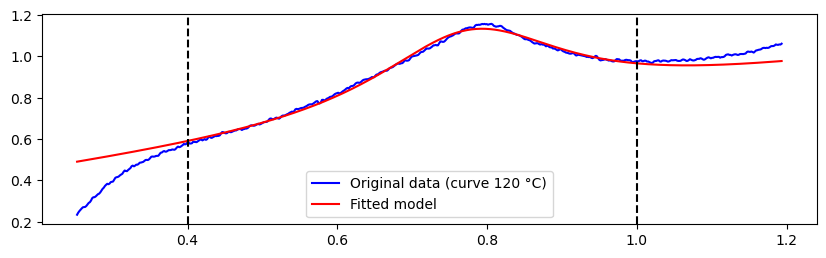

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

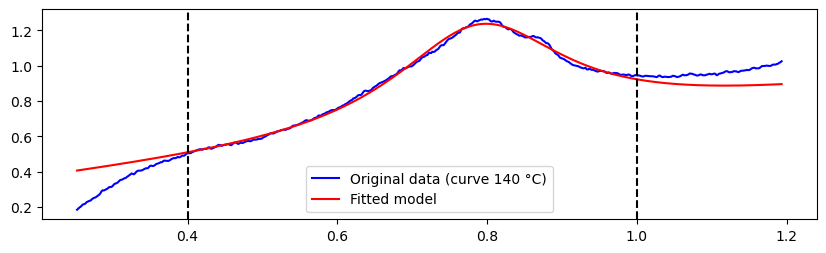

In [146]:
### LINEAR LORENTZIAN FIT ###


fit_range_min = 0.4
fit_range_max = 1
params_list = []

for i in range(y_values.shape[1]):
    y = y_values[:, i]

    fit_mask = (x >= fit_range_min) & (x <= fit_range_max)
    x_fit = x[fit_mask]
    y_fit = y[fit_mask]

    # initial guesses for m, c, A, mu, sigma
    initial_guess = [
        1,                   # slope m
        np.mean(y_fit),      # intercept c
        max(y_fit),          # amplitude A
        x_fit[np.argmax(y_fit)],  # center mu
        0.1                  # width sigma (positive)
    ]

    try:
        params, _ = curve_fit(
            linear_lorentzian_func, 
            x_fit, 
            y_fit, 
            p0=initial_guess, 
            bounds=([-np.inf, -np.inf, -np.inf, fit_range_min, 0], [np.inf, np.inf, np.inf, fit_range_max, np.inf])
        )
        
        m, c, A, mu, sigma = params
        params_list.append([dataset_labels[i], m, c, A, mu, sigma])

        fitted_model = linear_lorentzian_func(x, m, c, A, mu, sigma)
        residuals = y - fitted_model
        
        plt.figure(figsize=(10, 6))
        
        plt.subplot(2, 1, 1)
        plt.plot(x, y, 'b-', label=f'Original data (curve {dataset_labels[i]} °C)')
        plt.plot(x, fitted_model, 'r-', label=f'Fitted model')
        plt.axvline(fit_range_min, color='k', linestyle='--')
        plt.axvline(fit_range_max, color='k', linestyle='--')
        plt.legend()
        
#         plt.subplot(2, 1, 2)
#         plt.plot(x, residuals, 'g-', label='Residuals')
#         plt.legend()

        plt.show()
        
    except RuntimeError as e:
        print(f"Fit did not converge for dataset {dataset_labels[i]}: {e}")


In [147]:
params_df = pd.DataFrame(params_list, columns=['Dataset', 'm', 'c', 'A', 'mu', 'sigma'])

## FWMH calculation


- Cell below calculates full width at half maximum (`fwhm`) using: $FWHM = 2\sqrt{2 ln(2)} \cdot \sigma \approx 2.355 \sigma $ 

In [156]:
### loops through calculated params and finds FWHM based on above formula using standard deviation sigma ###
params_list_with_fwhm = []

for params in params_list:
    dataset_label, m, c, A, mu, sigma = params
    fwhm = 2.355 * sigma  # FWHM calculation
    params_list_with_fwhm.append([dataset_label, m, c, A, mu, sigma, fwhm])


params_df = pd.DataFrame(params_list_with_fwhm, columns=['Dataset', 'm', 'c', 'A', 'mu', 'sigma', 'FWHM'])
print(params_df)

  Dataset         m         c         A        mu     sigma      FWHM
0      RT  0.511943  0.550096  0.046315  0.793082  0.083387  0.196376
1      60  0.421271  0.407967  0.188544  0.786920  0.145924  0.343650
2      80  0.492711  0.358944  0.188623  0.781376  0.149297  0.351596
3     100  0.504525  0.256269  0.243152  0.778691  0.151980  0.357912
4     120  0.498796  0.331155  0.201794  0.777892  0.156424  0.368380
5     140  0.490704  0.244690  0.266855  0.790432  0.140961  0.331964


## Scherrer equation calculation

- cell below calculates crystallite coherence length $D_{hkl}$ (`D`) using the Scherrer equation
- Scherrer equation is: $D_{hkl} = \frac{2\pi K}{ \Delta q_{hkl}}$
- $K$ is the Scherrer constant, assume to be 1 (`K`)
- $\Delta q_{hkl}$ is the FWHM of the diffraction peaks (`fwhm`)

In [158]:
### calculating coherence length of crystallites in nm ###

K = 1  # Scherrer constant, assume to be 1

params_df['D'] = (2 * np.pi * K) / params_df['FWHM'] / 10
# division by 10 here is to convert from Angstrom to nanometers

print(params_df[['Dataset', 'D']])

  Dataset         D
0      RT  3.199571
1      60  1.828366
2      80  1.787049
3     100  1.755510
4     120  1.705628
5     140  1.892731


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

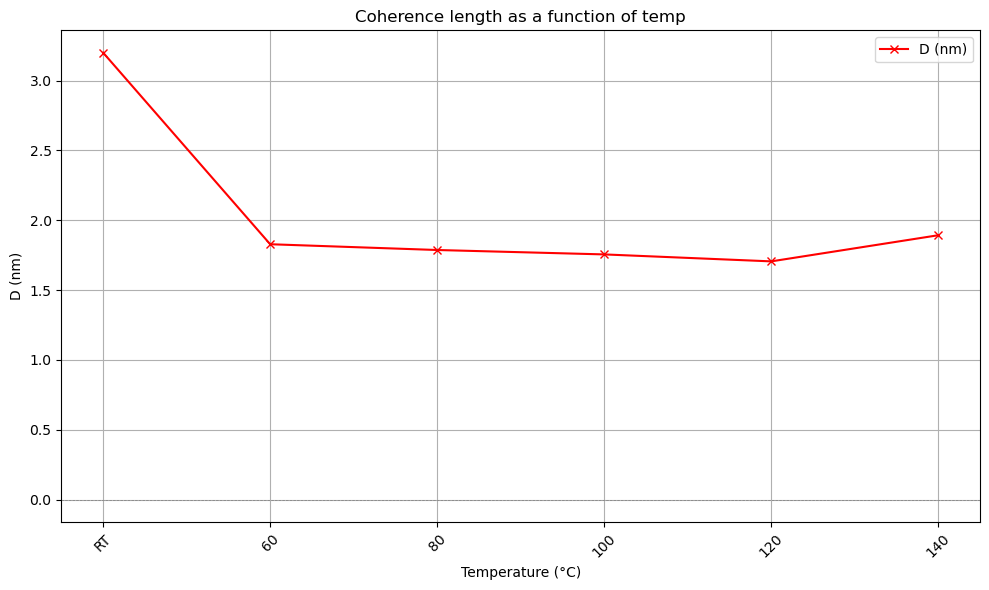

In [159]:
### plotting coherence length as a function of some variable ###

plt.figure(figsize=(10, 6))
x_values = np.arange(len(params_df))
plt.plot(x_values, params_df['D'], marker='x', linestyle='-', color='r', label='D (nm)')


plt.xticks(x_values, params_df['Dataset'].values, rotation=45) 


plt.xlabel('Temperature (°C)')
plt.ylabel('D (nm)')
plt.title('Coherence length as a function of temp')
plt.axhline(0, color='gray', lw=0.5, linestyle='--')  # first argument makes baseline y = arg (i.e. horiz line)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [152]:
### SPECIAL CASE WHERE TWO PEAKS OVERLAP ###


# def linear_double_lorentzian_func(x, m, c, A1, mu1, gamma1, A2, mu2, gamma2):
#     linear_part = m * x + c
#     lorentzian1 = A1 * gamma1**2 / ((x - mu1)**2 + gamma1**2)
#     lorentzian2 = A2 * gamma2**2 / ((x - mu2)**2 + gamma2**2)
#     return linear_part + lorentzian1 + lorentzian2

# def fit_double_lorentzian(data, x, label):

#     if label not in params_df['Dataset'].values:
#         print(f"Dataset label '{label}' not found.")
#         return

#     label_index = params_df[params_df['Dataset'] == label].index[0]
#     y = y_values[:, label_index]


#     fit_mask = (x >= fit_range_min) & (x <= fit_range_max)
#     x_fit = x[fit_mask]
#     y_fit = y[fit_mask]

#     # initial guesses, enter numbers based on visual inspection
#     initial_guess = [
#         1,                # slope (m) of the linear background
#         np.mean(y_fit),   # intercept (c) of the linear background
#         max(y_fit) / 2,   # amplitude of first Lorentzian (A1)
#         0.79,             # center of first Lorentzian (mu1)
#         0.02,             # width of first Lorentzian (gamma1)
#         max(y_fit) / 2,   # amplitude of second Lorentzian (A2)
#         0.85,             # center of second Lorentzian (mu2)
#         0.02              # width of second Lorentzian (gamma2)
#     ]

#     params, _ = curve_fit(linear_double_lorentzian_func, x_fit, y_fit, p0=initial_guess)
#     m, c, A1, mu1, gamma1, A2, mu2, gamma2 = params

#     plt.figure(figsize=(10, 6))
#     plt.plot(x, y, 'b-', label=f'Original data ({label})°C')

#     combined_fit = linear_double_lorentzian_func(x, m, c, A1, mu1, gamma1, A2, mu2, gamma2)
#     plt.plot(x, combined_fit, 'r-', label='Double Lorentzian fit')

#     linear_part = m * x + c
#     plt.plot(x, linear_part, 'k--', label='Linear component')

#     lorentzian1 = A1 * gamma1**2 / ((x - mu1)**2 + gamma1**2)
#     lorentzian2 = A2 * gamma2**2 / ((x - mu2)**2 + gamma2**2)
#     plt.plot(x, lorentzian1 + linear_part, 'g--', label='Lorentzian 1')
#     plt.plot(x, lorentzian2 + linear_part, 'm--', label='Lorentzian 2')

#     plt.xlabel('q-values')
#     plt.ylabel('Intensity')
#     plt.title(f'Double Lorentzian Fit for {label}')
#     plt.legend()
#     plt.show()

#     fwhm1 = 2 * abs(gamma1)
#     fwhm2 = 2 * abs(gamma2)
#     print(f"FWHM for Lorentzian 1: {fwhm1}")
#     print(f"FWHM for Lorentzian 2: {fwhm2}")


# fit_double_lorentzian(data, x, '140')


In [155]:
# # not essential for calculating FWHM 
# # plots both parts of fit - the linear part and the isolated Gaussian
# # this is to check it looks sensible

# # loop through each dataset to plot the original data, combined fit, linear, and Gaussian parts
# for i in range(y_values.shape[1]):
#     y = y_values[:, i]
    
#     # retrieve parameters from the DataFrame
#     m = params_df.loc[i, 'm']
#     c = params_df.loc[i, 'c']
#     A = params_df.loc[i, 'A']
#     mu = params_df.loc[i, 'mu']
#     sigma = params_df.loc[i, 'sigma']
    
#     # calculate indiviual components
#     linear_component = m * x + c # linear
#     gaussian_component = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) # Gaussian
#     combined_fit = linear_component + gaussian_component  # linear + Gaussian

#     plt.figure(figsize=(12, 8))

#     # plot 1: original data with combined fit
#     plt.subplot(4, 1, 1)
#     plt.plot(x, y, 'b-', label=f'Original Data ({dataset_labels[i]} °C)')
#     plt.plot(x, combined_fit, 'r--', label='Combined Fit (Linear + Gaussian)')
#     plt.axvline(fit_range_min, color='k', linestyle='--', label='Fit range')
#     plt.axvline(fit_range_max, color='k', linestyle='--')
#     plt.title(f'{dataset_labels[i]} °C data')
#     plt.legend()

#     # plot 2: linear component only
#     plt.subplot(4, 1, 2)
#     plt.plot(x, linear_component, 'g-', label='Linear Component (y = mx + c)')
#     plt.legend()


#     # plot 3: Gaussian component only
#     plt.subplot(4, 1, 3)
#     plt.plot(x, gaussian_component, 'm-', label=f'Gaussian Component for {dataset_labels[i]} °C sample')
#     plt.legend()

# #     # plot 4: Original data minus linear component (isolated Gaussian data)
# #     plt.subplot(4, 1, 4)
# #     plt.plot(x, y - linear_component, 'b-', label='Isolated Gaussian Data')
# #     plt.plot(x, gaussian_component, 'r--', label='Fitted Gaussian')
# #     plt.legend()

#     plt.xlabel('x')
#     plt.ylabel('Intensity')
#     plt.tight_layout()
#     plt.show()
